In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the random module.
import random



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
print(cities)

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | sao filipe
Processing Record 4 of Set 1 | aswan
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | kruisfontein
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | kirkenaer
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | matadi
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | provideniya
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | batavia
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | haines junction
Processing Record 22 of Set 1 | bilibino
Processing Record 23 of Set 1 | bredasdorp
Processing Record 24 of Set 1 | newport
Proc

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,59.94,77,0,10.36,ZA,2021-09-23 04:41:18
1,Vaini,-21.2000,-175.2000,77.16,83,20,9.22,TO,2021-09-23 04:43:28
2,Sao Filipe,14.8961,-24.4956,78.53,78,37,8.99,CV,2021-09-23 04:44:11
3,Aswan,24.0934,32.9070,83.50,26,0,6.91,EG,2021-09-23 04:44:12
4,Port Alfred,-33.5906,26.8910,64.72,57,78,12.48,ZA,2021-09-23 04:44:13
5,Kruisfontein,-34.0033,24.7314,62.08,44,33,10.51,ZA,2021-09-23 04:43:06
6,Chokurdakh,70.6333,147.9167,34.86,58,100,2.93,RU,2021-09-23 04:43:15
7,Kirkenaer,60.4564,12.0582,55.04,83,85,6.58,NO,2021-09-23 04:44:14
8,Rikitea,-23.1203,-134.9692,74.39,74,10,21.61,PF,2021-09-23 04:41:32
9,Upernavik,72.7868,-56.1549,21.90,80,97,5.73,GL,2021-09-23 04:44:04


In [18]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        563 non-null    object 
 1   Lat         563 non-null    float64
 2   Lng         563 non-null    float64
 3   Max Temp    563 non-null    float64
 4   Humidity    563 non-null    int64  
 5   Cloudiness  563 non-null    int64  
 6   Wind Speed  563 non-null    float64
 7   Country     563 non-null    object 
 8   Date        563 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 39.7+ KB


In [20]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]


In [21]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2021-09-23 04:41:18,-33.0153,27.9116,59.94,77,0,10.36
1,Vaini,TO,2021-09-23 04:43:28,-21.2000,-175.2000,77.16,83,20,9.22
2,Sao Filipe,CV,2021-09-23 04:44:11,14.8961,-24.4956,78.53,78,37,8.99
3,Aswan,EG,2021-09-23 04:44:12,24.0934,32.9070,83.50,26,0,6.91
4,Port Alfred,ZA,2021-09-23 04:44:13,-33.5906,26.8910,64.72,57,78,12.48
...,...,...,...,...,...,...,...,...,...
558,Haicheng,CN,2021-09-23 04:51:14,40.8516,122.7475,64.42,73,79,8.66
559,Sillamae,EE,2021-09-23 04:51:15,59.3997,27.7547,44.29,78,96,8.41
560,Havoysund,NO,2021-09-23 04:43:23,70.9963,24.6622,49.08,81,100,14.70
561,Carahue,CL,2021-09-23 04:51:15,-38.7000,-73.1667,41.20,93,54,1.39


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1632373069.6585438

In [28]:
today = time.strftime("%x")
today

'09/22/21'

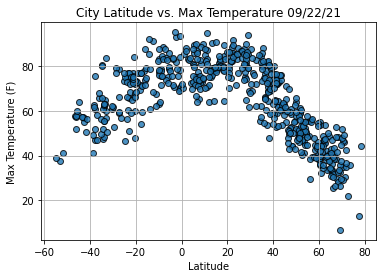

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

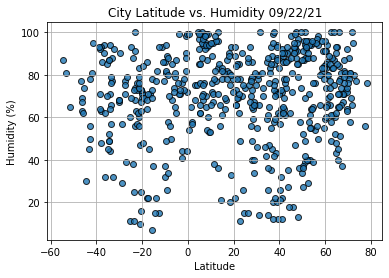

In [30]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

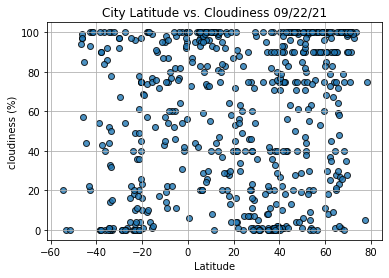

In [31]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

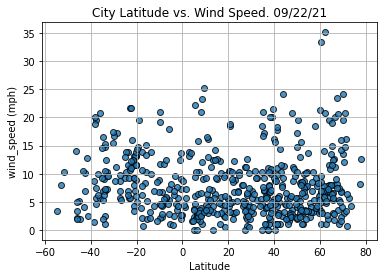

In [33]:
# Build the scatter plot for latitude vs. wind speed..
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed. "+ time.strftime("%x"))
plt.ylabel("wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")

    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Sao Filipe,CV,2021-09-23 04:44:11,14.8961,-24.4956,78.53,78,37,8.99
3,Aswan,EG,2021-09-23 04:44:12,24.0934,32.9070,83.50,26,0,6.91
6,Chokurdakh,RU,2021-09-23 04:43:15,70.6333,147.9167,34.86,58,100,2.93
7,Kirkenaer,NO,2021-09-23 04:44:14,60.4564,12.0582,55.04,83,85,6.58
9,Upernavik,GL,2021-09-23 04:44:04,72.7868,-56.1549,21.90,80,97,5.73


In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

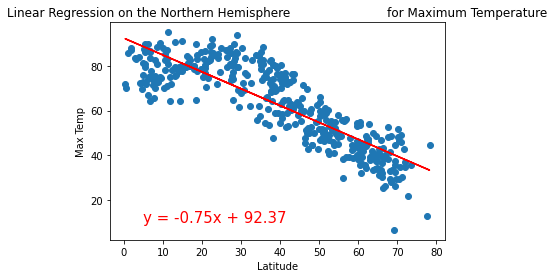

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,10))

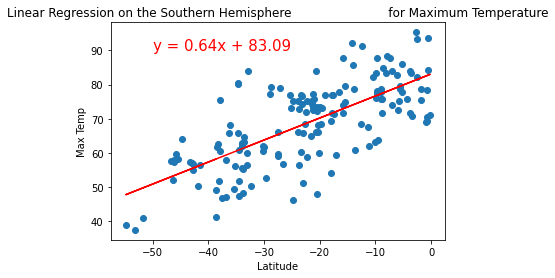

In [46]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

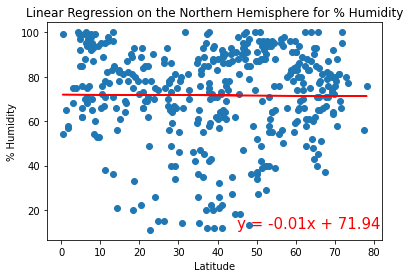

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for % Humidity', '% Humidity',(45,12))

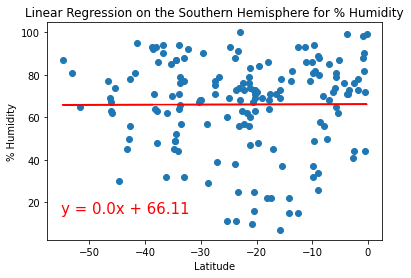

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Humidity', '% Humidity',(-55,15))

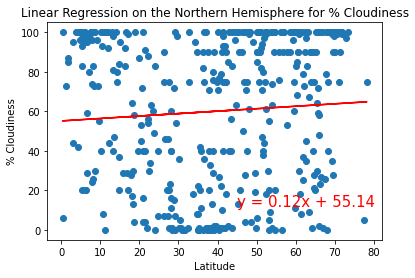

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for % Cloudiness', '% Cloudiness',(45,12))

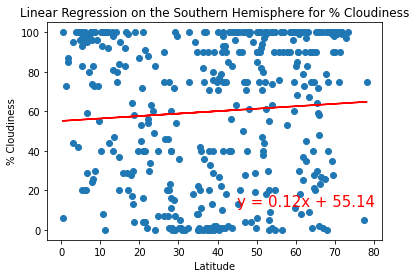

In [70]:
# Linear regression on the Southern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Cloudiness', '% Cloudiness',(45,12))

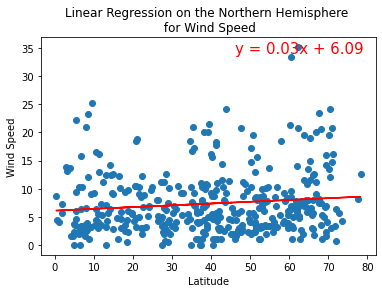

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(46,34))

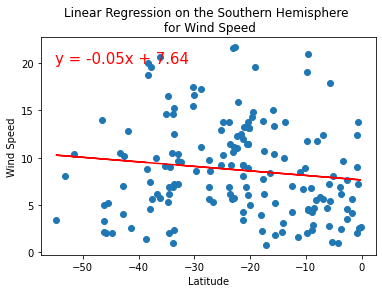

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,20))